# Preliminary Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
customer_data = pd.read_csv('data/retail_customer_data.csv')
customer_data.rename(columns={
    'Customer ID': 'customer_id', 
    'Customer Age': 'customer_age', 
    'Omni Customer': 'omni_customer', 
    'Total Visits': 'total_visits',
    'Avg Spending ($)': 'avg_spending',
    'Customer City': 'customer_city',
    'Customer State': 'customer_state',
    'Device Type': 'device_type',
    'Has Used Promotions': 'promotion'}, inplace=True)
customer_data.drop(columns=['customer_id'], inplace=True)
customer_data.head()

,customer_age,omni_customer,total_visits,avg_spending,customer_city,customer_state,device_type,promotion
0,40,No,2,249.59,Charlotte,NC,Windows,No
1,34,Yes,1,246.59,New York,NY,Windows,Yes
2,25,Yes,1,245.05,San Francisco,CA,iOS,Yes
3,33,No,1,243.81,Chicago,IL,iOS,No
4,56,Yes,2,240.75,Jacksonville,FL,Android,No


## Numerical Features

In [3]:
numerical_features = ['customer_age', 'total_visits', 'avg_spending']
customer_data[numerical_features].describe().round(4)

,customer_age,total_visits,avg_spending
count,1628.0000,1628.0000,1628.0000
mean,34.8213,22.1462,55.1492
std,8.8943,30.4102,29.6781
min,23.0000,1.0000,20.0100
25%,27.0000,11.0000,35.9075
50%,34.0000,21.0000,51.7450
75%,41.0000,31.0000,66.7750
max,65.0000,708.0000,249.5900


              customer_age  total_visits  avg_spending
customer_age      1.000000     -0.003694     -0.020348
total_visits     -0.003694      1.000000     -0.120469
avg_spending     -0.020348     -0.120469      1.000000


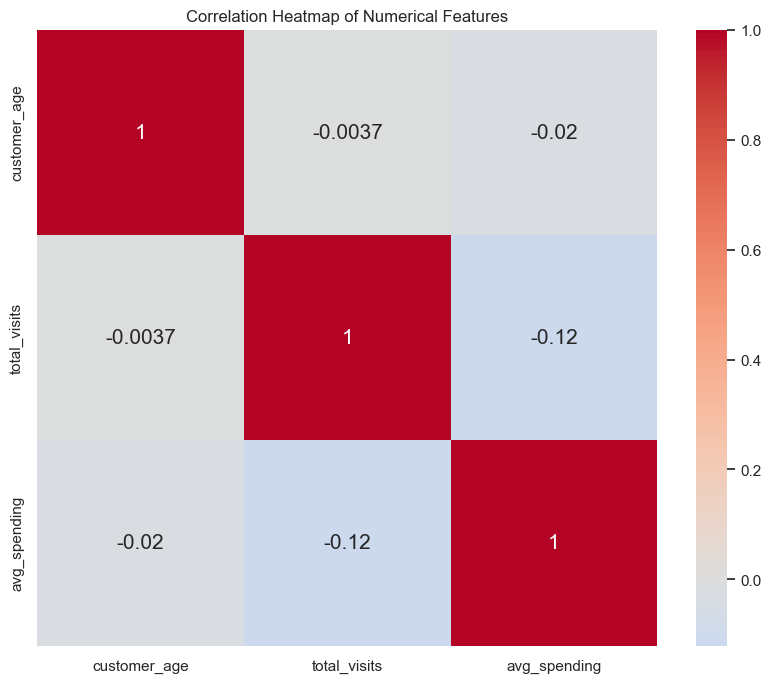

In [4]:
correlation_matrix = customer_data[numerical_features].corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={'size': 15})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Categorical Features

In [5]:
category_features = ['omni_customer', 'customer_city', 'customer_state', 'device_type', 'promotion']
for feature in category_features:
    df = pd.DataFrame(customer_data.groupby(feature).size(), columns=['count'])
    df['proportion'] = (df['count'] / df['count'].sum()).round(4)
    df.sort_values(by='count', ascending=False, inplace=True)
    print('----------------------------------')
    print(df)

----------------------------------
               count  proportion
omni_customer                   
No              1020      0.6265
Yes              608      0.3735
----------------------------------
               count  proportion
customer_city                   
Phoenix           96      0.0590
Columbus          94      0.0577
Dallas            93      0.0571
San Jose          93      0.0571
Washington        91      0.0559
Chicago           89      0.0547
Seattle           88      0.0541
Indianapolis      83      0.0510
Austin            83      0.0510
Houston           82      0.0504
Los Angeles       82      0.0504
Philadelphia      78      0.0479
Jacksonville      76      0.0467
Charlotte         76      0.0467
San Francisco     75      0.0461
Fort Worth        75      0.0461
New York          74      0.0455
San Diego         72      0.0442
Denver            70      0.0430
San Antonio       58      0.0356
----------------------------------
                count  proportion
cus

# Feature Selection

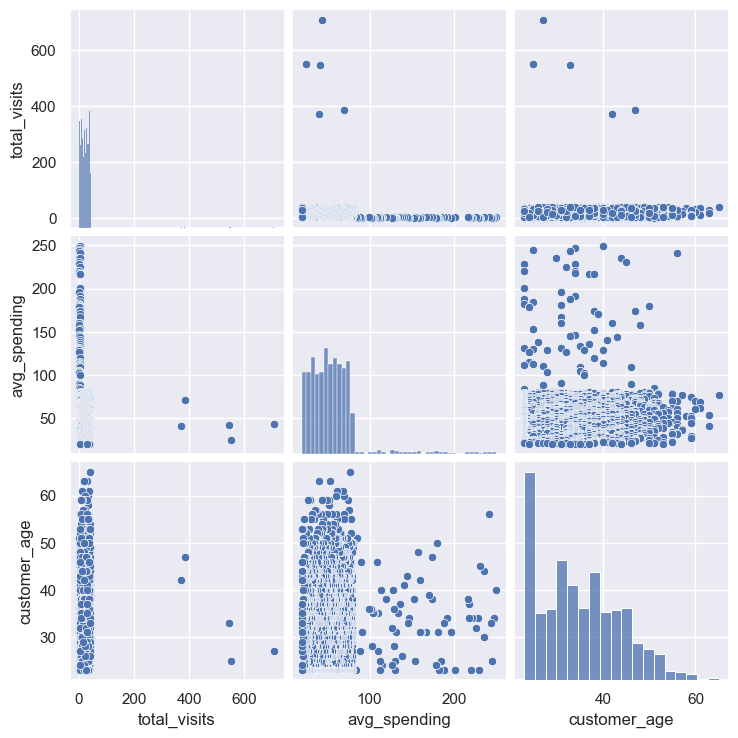

In [6]:
sns.pairplot(customer_data[['total_visits', 'avg_spending', 'customer_age']])

## total_visits & avg_spending

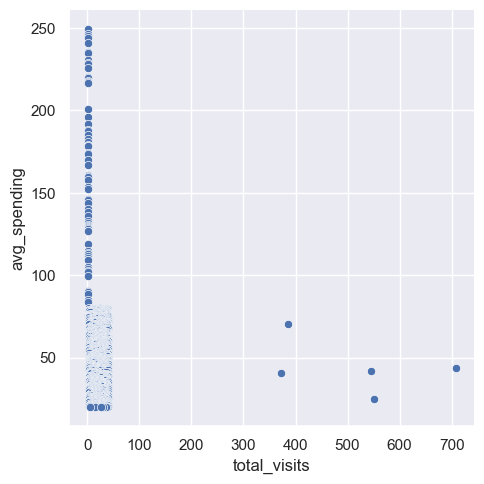

In [7]:
sns.relplot(data=customer_data, x='total_visits', y='avg_spending')

In [8]:
customer_data[customer_data.total_visits > 40]

,customer_age,omni_customer,total_visits,avg_spending,customer_city,customer_state,device_type,promotion
323,47,Yes,385,70.29,Indianapolis,IN,iOS,Yes
1055,27,No,708,43.58,San Antonio,TX,iOS,Yes
1091,33,Yes,546,41.96,Seattle,WA,iOS,Yes
1112,42,No,372,40.74,San Antonio,TX,Android,No
1514,25,No,551,24.77,Denver,CO,iOS,Yes


## customer_age

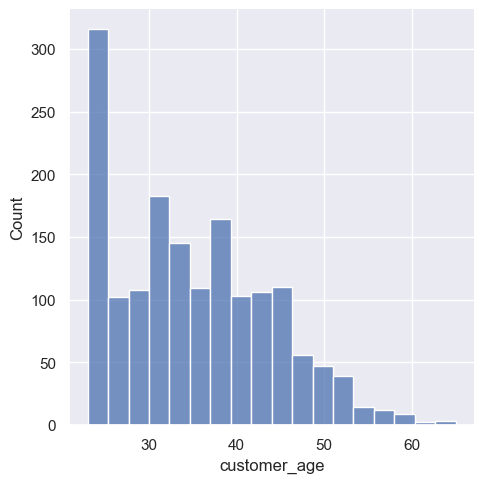

In [9]:
sns.displot(customer_data, x='customer_age')

## omni_customer

<Axes: xlabel='omni_customer', ylabel='Percent'>

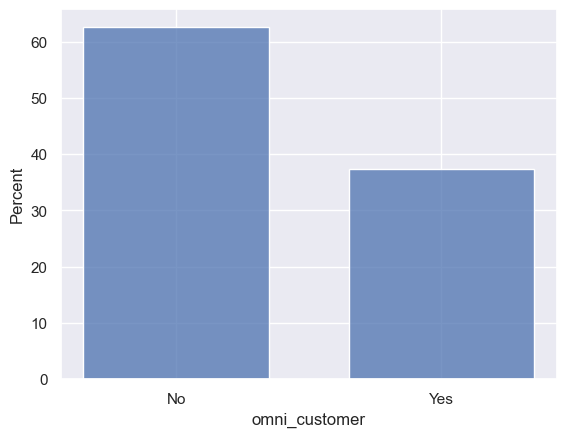

In [10]:
sns.histplot(data=customer_data, x='omni_customer', stat='percent', shrink=.7)

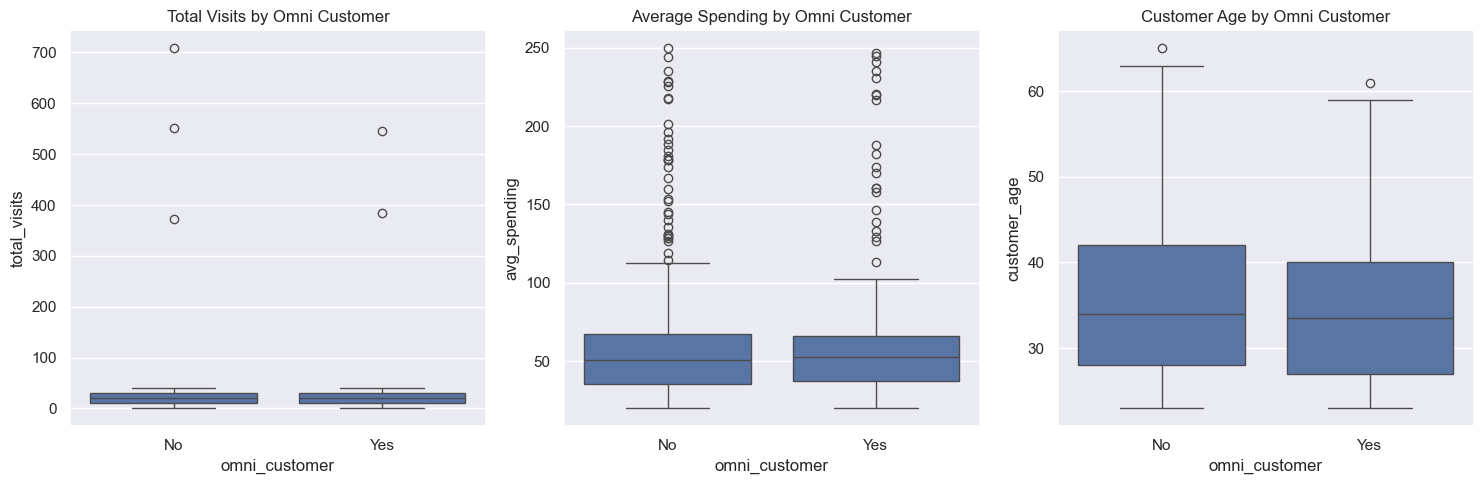

In [11]:
f, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=customer_data, x='omni_customer', y='total_visits', ax=axs[0])
sns.boxplot(data=customer_data, x='omni_customer', y='avg_spending', ax=axs[1])
sns.boxplot(data=customer_data, x='omni_customer', y='customer_age', ax=axs[2])
axs[0].set_title('Total Visits by Omni Customer')
axs[1].set_title('Average Spending by Omni Customer')
axs[2].set_title('Customer Age by Omni Customer')
plt.tight_layout()

In [12]:
customer_data[customer_data.omni_customer=='Yes'][numerical_features].describe().round(4)

,customer_age,total_visits,avg_spending
count,608.0000,608.0000,608.0000
mean,34.0181,22.0559,55.6213
std,8.2597,28.3691,30.2947
min,23.0000,1.0000,20.0600
25%,27.0000,11.0000,37.0900
50%,33.5000,20.0000,52.5750
75%,40.0000,30.0000,65.7200
max,61.0000,546.0000,246.5900


In [13]:
customer_data[customer_data.omni_customer=='No'][numerical_features].describe().round(4)

,customer_age,total_visits,avg_spending
count,1020.0000,1020.0000,1020.0000
mean,35.3000,22.2000,54.8678
std,9.2227,31.5776,29.3158
min,23.0000,1.0000,20.0100
25%,28.0000,10.0000,35.6025
50%,34.0000,21.0000,50.7050
75%,42.0000,31.0000,67.1025
max,65.0000,708.0000,249.5900


In [14]:
category_features = ['customer_city', 'customer_state', 'device_type', 'promotion']
for feature in category_features:
    df = pd.DataFrame(customer_data[customer_data.omni_customer=='Yes'].groupby(feature).size(), columns=['count'])
    df['proportion'] = (df['count'] / df['count'].sum()).round(4)
    df.sort_values(by='count', ascending=False, inplace=True)
    print('----------------------------------')
    print(df)

----------------------------------
               count  proportion
customer_city                   
Columbus          43      0.0707
Chicago           40      0.0658
San Jose          36      0.0592
Seattle           35      0.0576
Dallas            34      0.0559
Houston           33      0.0543
San Diego         33      0.0543
Los Angeles       32      0.0526
Phoenix           31      0.0510
Washington        30      0.0493
Fort Worth        30      0.0493
Philadelphia      28      0.0461
Indianapolis      28      0.0461
San Francisco     28      0.0461
Charlotte         26      0.0428
New York          26      0.0428
Denver            26      0.0428
Austin            26      0.0428
San Antonio       24      0.0395
Jacksonville      19      0.0312
----------------------------------
                count  proportion
customer_state                   
TX                147      0.2418
CA                129      0.2122
OH                 43      0.0707
IL                 40      0.0658


## promotion

<Axes: xlabel='promotion', ylabel='Percent'>

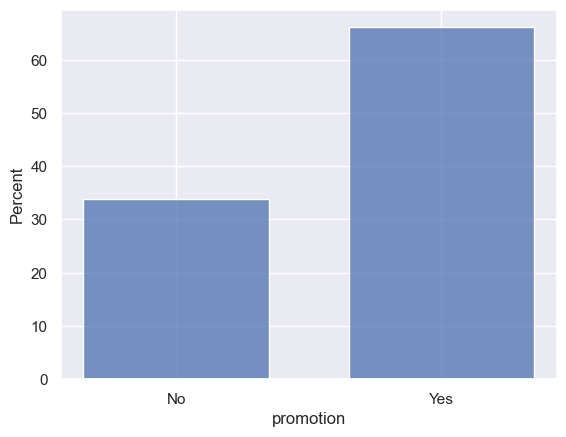

In [15]:
sns.histplot(data=customer_data, x='promotion', stat='percent', shrink=.7)

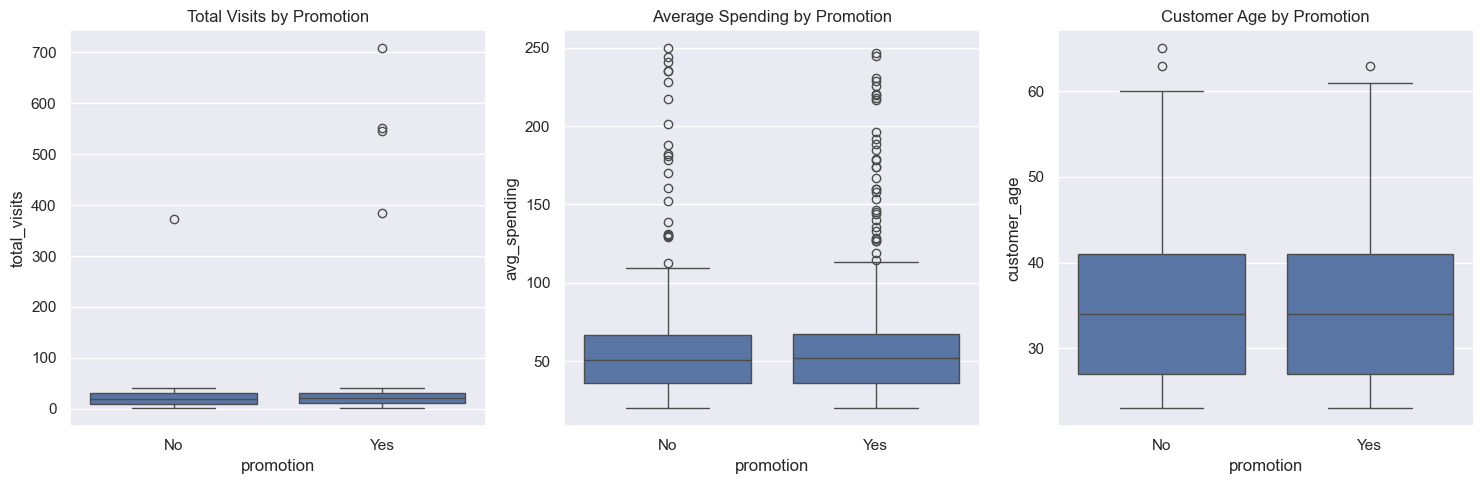

In [16]:
f, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=customer_data, x='promotion', y='total_visits', ax=axs[0])
sns.boxplot(data=customer_data, x='promotion', y='avg_spending', ax=axs[1])
sns.boxplot(data=customer_data, x='promotion', y='customer_age', ax=axs[2])
axs[0].set_title('Total Visits by Promotion')
axs[1].set_title('Average Spending by Promotion')
axs[2].set_title('Customer Age by Promotion')
plt.tight_layout()

In [17]:
customer_data[customer_data.promotion=='Yes'][numerical_features].describe().round(4)

,customer_age,total_visits,avg_spending
count,1076.0000,1076.0000,1076.0000
mean,34.7928,22.7723,55.0743
std,8.6742,34.8351,28.5831
min,23.0000,1.0000,20.1000
25%,27.0000,11.0000,35.8825
50%,34.0000,21.0000,52.2000
75%,41.0000,31.0000,67.0950
max,63.0000,708.0000,246.5900


In [18]:
customer_data[customer_data.promotion=='No'][numerical_features].describe().round(4)

,customer_age,total_visits,avg_spending
count,552.0000,552.0000,552.0000
mean,34.8768,20.9257,55.2953
std,9.3163,18.9982,31.7305
min,23.0000,1.0000,20.0100
25%,27.0000,10.0000,36.1100
50%,34.0000,20.0000,50.5550
75%,41.0000,31.0000,66.5850
max,65.0000,372.0000,249.5900


In [19]:
category_features = ['omni_customer', 'customer_city', 'customer_state', 'device_type']
for feature in category_features:
    df = pd.DataFrame(customer_data[customer_data.promotion=='Yes'].groupby(feature).size(), columns=['count'])
    df['proportion'] = (df['count'] / df['count'].sum()).round(4)
    df.sort_values(by='count', ascending=False, inplace=True)
    print('----------------------------------')
    print(df)

----------------------------------
               count  proportion
omni_customer                   
No               671      0.6236
Yes              405      0.3764
----------------------------------
               count  proportion
customer_city                   
Columbus          66      0.0613
Dallas            64      0.0595
San Jose          62      0.0576
Phoenix           62      0.0576
Washington        57      0.0530
Chicago           56      0.0520
Houston           55      0.0511
Los Angeles       55      0.0511
Indianapolis      54      0.0502
Philadelphia      54      0.0502
Austin            54      0.0502
Fort Worth        53      0.0493
Seattle           52      0.0483
San Francisco     51      0.0474
Denver            51      0.0474
Jacksonville      49      0.0455
New York          47      0.0437
San Diego         47      0.0437
Charlotte         44      0.0409
San Antonio       43      0.0400
----------------------------------
                count  proportion
cus

## device_type

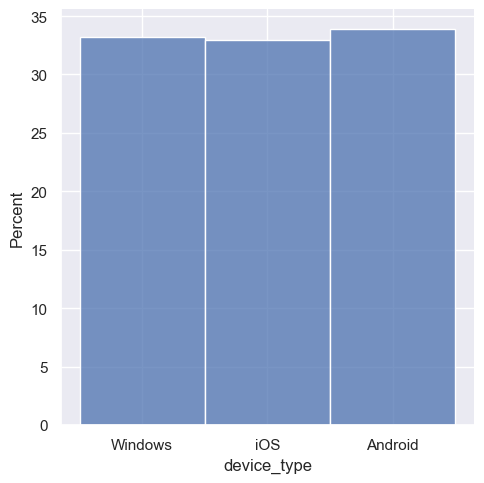

In [20]:
g = sns.displot(data=customer_data, x='device_type', stat='percent')

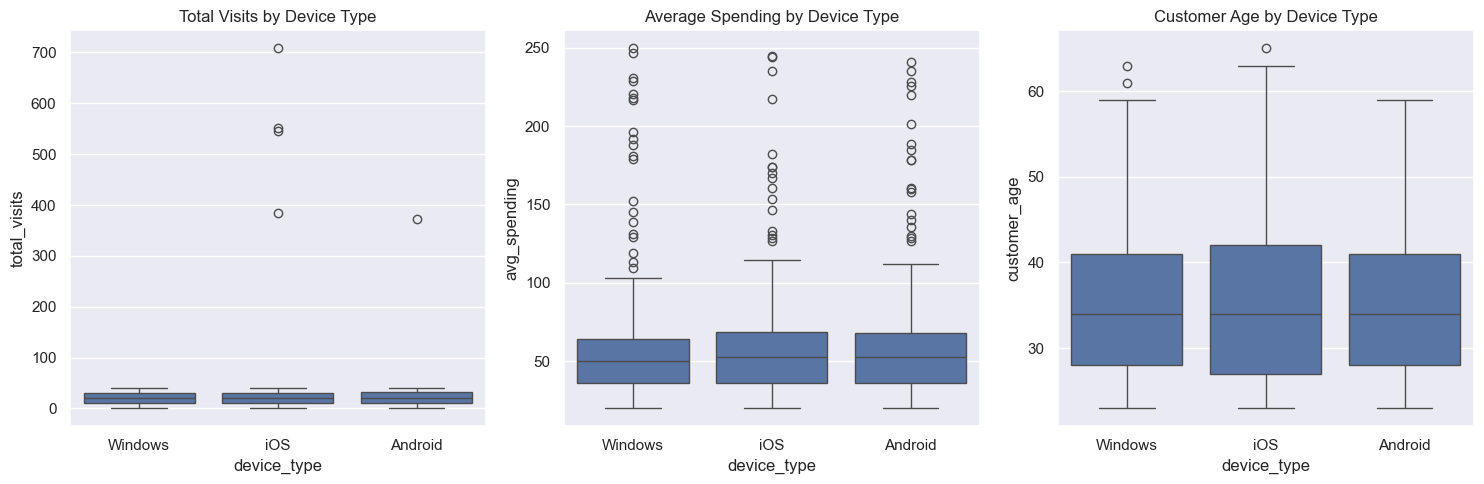

In [21]:
f, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=customer_data, x='device_type', y='total_visits', ax=axs[0])
sns.boxplot(data=customer_data, x='device_type', y='avg_spending', ax=axs[1])
sns.boxplot(data=customer_data, x='device_type', y='customer_age', ax=axs[2])
axs[0].set_title('Total Visits by Device Type')
axs[1].set_title('Average Spending by Device Type')
axs[2].set_title('Customer Age by Device Type')
plt.tight_layout()

In [22]:
mean = customer_data.groupby('device_type')[numerical_features].mean().round(4)
std = customer_data.groupby('device_type')[numerical_features].std().round(4)
result = pd.concat([mean, std], axis=0, keys=['mean', 'std'])
result

customer_age  total_visits  avg_spending
     device_type                                          
mean Android           35.1975       21.5707       55.9290
     Windows           34.5611       19.9556       54.2717
     iOS               34.6959       24.9459       55.2302
std  Android            8.7558       19.2412       29.8461
     Windows            8.8230       11.5197       30.9275
     iOS                9.1086       47.7947       28.2150

## customer_state

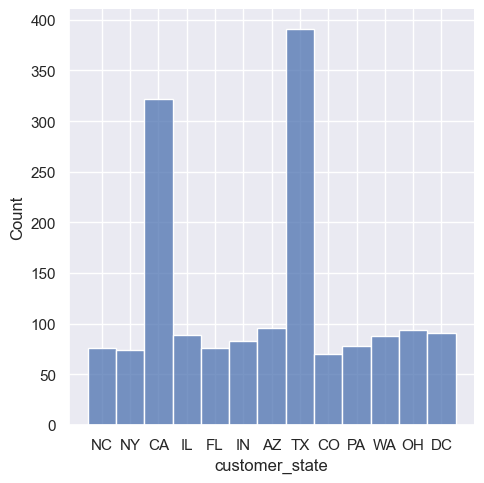

In [23]:
sns.displot(data=customer_data, x='customer_state')

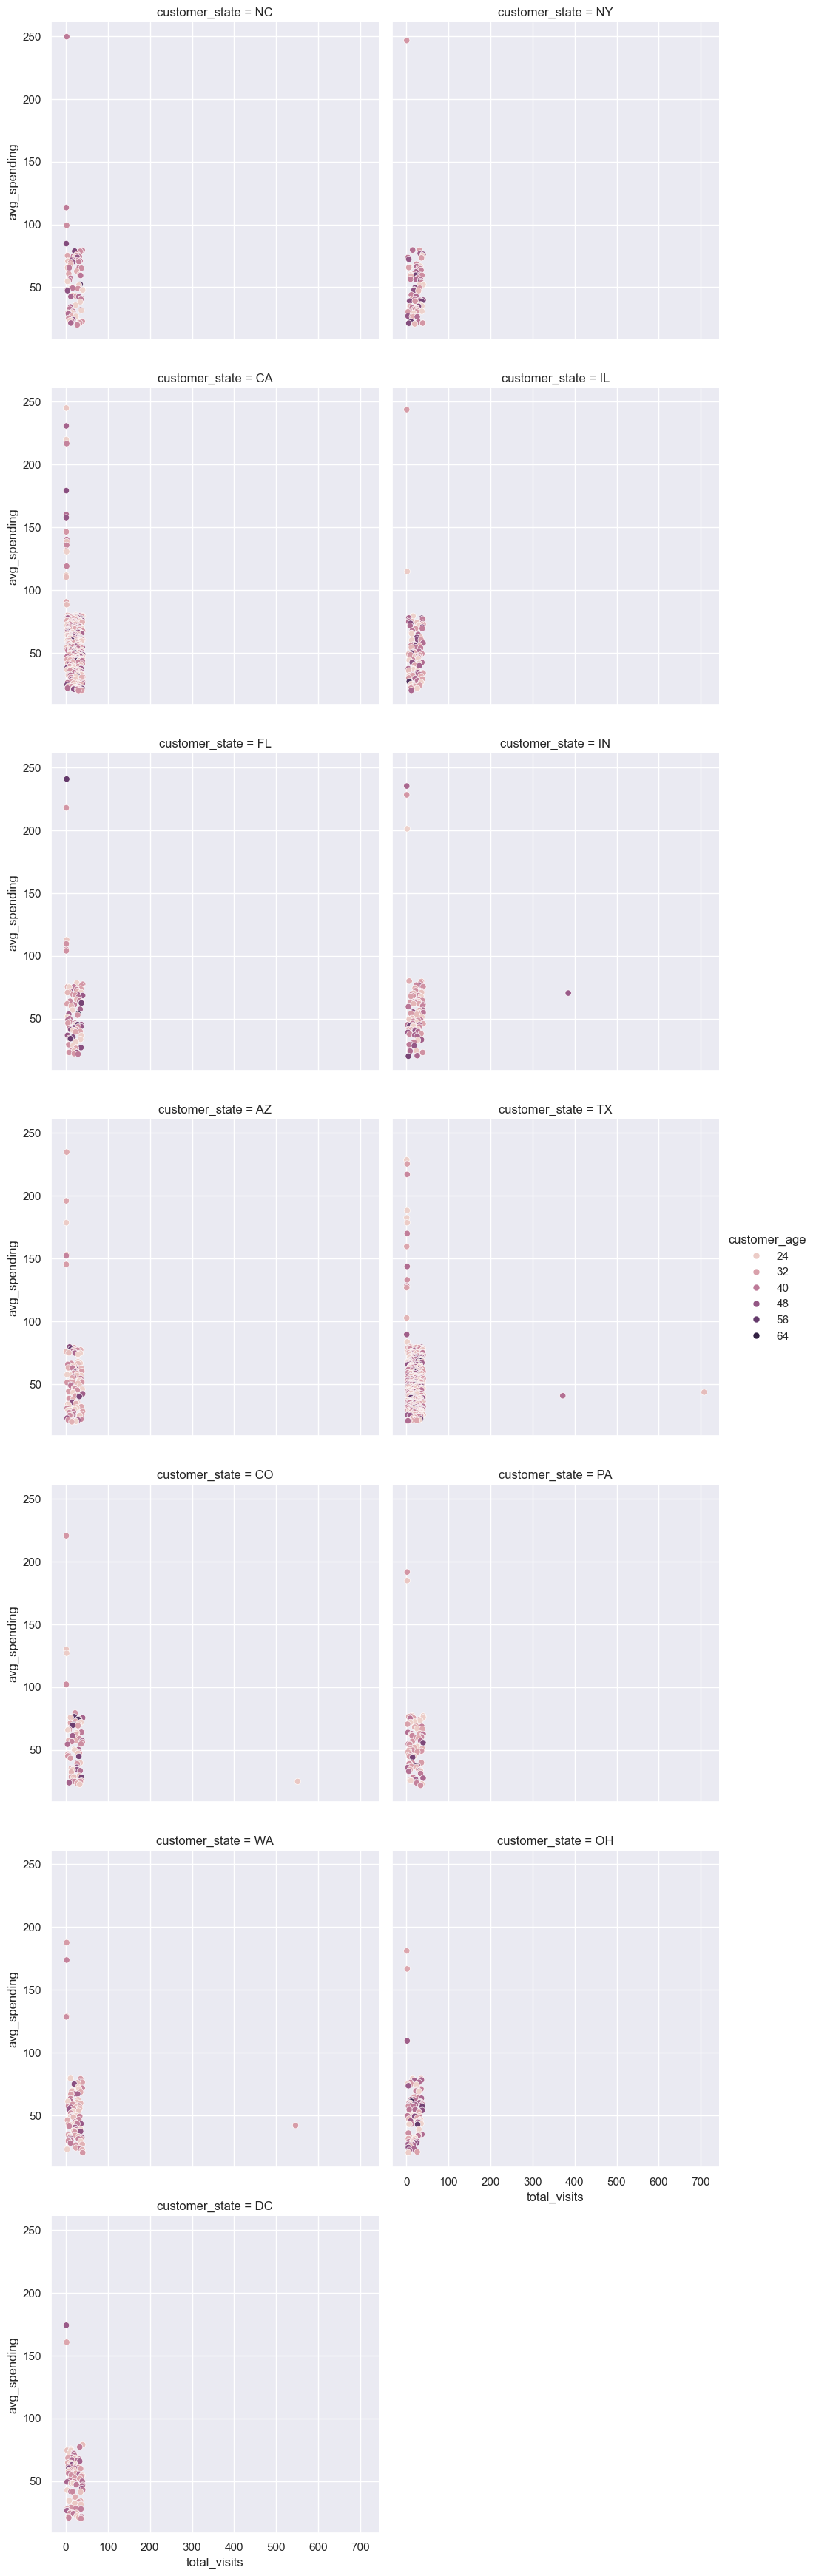

In [24]:
sns.relplot(data=customer_data, x='total_visits', y='avg_spending', hue='customer_age', col='customer_state', col_wrap=2)

In [25]:
customer_data.groupby('customer_state')[['customer_age', 'total_visits', 'avg_spending']].mean().round(4)

,customer_age,total_visits,avg_spending
customer_state,,,
AZ,32.7083,19.7396,57.5036
CA,34.6553,20.5217,57.8339
CO,34.8571,29.2143,54.7287
DC,34.5165,20.2967,52.5693
FL,36.3158,20.3421,59.3095
IL,36.1124,21.3708,51.6079
IN,35.7470,26.5301,58.3141
NC,35.8289,20.0263,55.3364
NY,36.4054,23.2297,50.3141


## customer_city

<Figure size 1500x600 with 0 Axes>

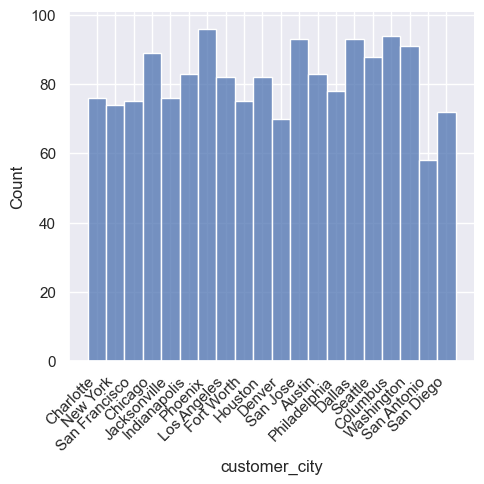

In [26]:
plt.figure(figsize=(15, 6))
sns.displot(data=customer_data, x='customer_city')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
customer_data.groupby('customer_city')[['customer_age', 'total_visits', 'avg_spending']].mean().round(4)

,customer_age,total_visits,avg_spending
customer_city,,,
Austin,34.0964,19.1084,56.1364
Charlotte,35.8289,20.0263,55.3364
Chicago,36.1124,21.3708,51.6079
Columbus,36.5106,19.3191,53.9385
Dallas,33.9355,21.7527,51.6666
Denver,34.8571,29.2143,54.7287
Fort Worth,34.1200,20.2800,54.2649
Houston,34.5488,20.7561,53.9272
Indianapolis,35.7470,26.5301,58.3141


In [28]:
customer_data.groupby('customer_city')[['customer_age', 'total_visits', 'avg_spending']].std().round(4)

,customer_age,total_visits,avg_spending
customer_city,,,
Austin,8.3864,11.8507,29.6833
Charlotte,8.4812,11.8984,31.0832
Chicago,9.3389,11.0344,27.6247
Columbus,9.2268,11.0300,25.0729
Dallas,9.4774,11.4110,21.8359
Denver,9.8279,64.2086,30.1369
Fort Worth,9.3635,11.6880,30.9450
Houston,9.5700,12.2450,29.0820
Indianapolis,7.8053,41.4183,35.3909


# K-Means Clustering

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

cluster_data = customer_data.drop(
    columns=[
        'omni_customer',
        'device_type', 
        'customer_state', 
        'customer_city'
        ], axis=1).copy()

# 1. 수치형 변수와 범주형 변수 구분
numeric_cols = cluster_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = cluster_data.select_dtypes(include=['object']).columns.tolist()

# 2. 범주형 변수 중 이진 변수와 비이진 변수 분리
binary_cols = [col for col in categorical_cols if cluster_data[col].nunique() == 2]
non_binary_cols = [col for col in categorical_cols if cluster_data[col].nunique() > 2]

# 3. 이진 변수는 0/1로 인코딩
for col in binary_cols:
    # 데이터 내 고유값 두 개를 0과 1로 매핑
    unique_vals = cluster_data[col].unique()
    cluster_data[col] = cluster_data[col].map({unique_vals[0]: 0, unique_vals[1]: 1})

# 4. 비이진 범주형 변수는 One-Hot 인코딩 (더미 변수 생성)
cluster_data = pd.get_dummies(cluster_data, columns=non_binary_cols, drop_first=True)

# 5. 사용할 변수 목록 구성
# 수치형 변수와 이진 인코딩된 변수는 그대로 사용하고, One-Hot 인코딩으로 새롭게 생성된 더미 변수들도 포함합니다.
features = numeric_cols + binary_cols
# 원래 비이진 범주형 변수명으로 시작하는 컬럼들을 추가
features += [col for col in cluster_data.columns if any(prefix in col for prefix in non_binary_cols)]

# 7. 수치형 변수 표준화 (클러스터링 전 스케일링)
scaler = StandardScaler()
cluster_data[numeric_cols] = scaler.fit_transform(cluster_data[numeric_cols])

# 8. 선택한 변수들로 최종 데이터셋 생성
X = cluster_data[features]

# 9. PCA를 사용하여 차원 축소
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

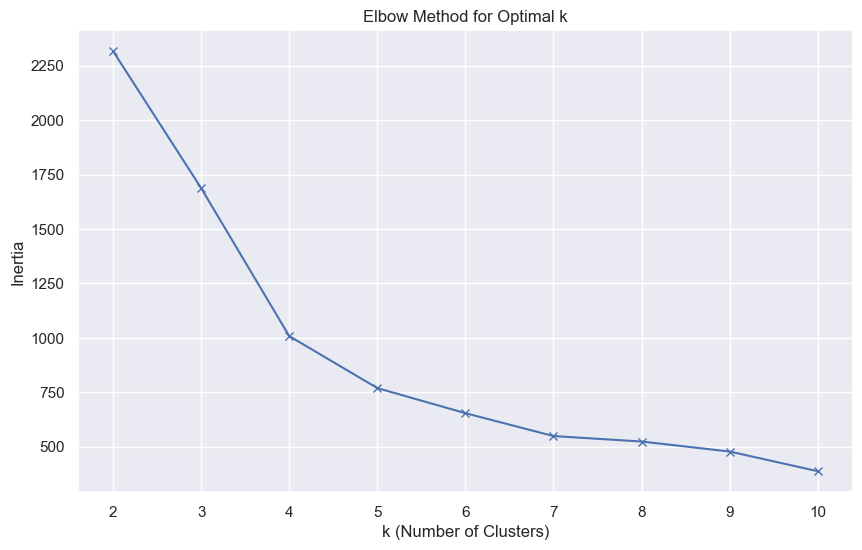

Suggested optimal number of clusters (elbow point): 6


In [30]:
# 클러스터 수의 범위 설정 (2부터 10까지)
k_range = range(2, 11)
inertias = []

# 각 k에 대해 K-means를 실행하고 inertia 계산
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Elbow Method 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# 차이값을 계산하여 elbow point 찾기
differences = np.diff(inertias)
differences_r = differences[1:] / differences[:-1]
elbow_point = np.argmin(differences_r) + 2

print(f"Suggested optimal number of clusters (elbow point): {elbow_point}")

In [31]:
# 9. K-Means 모델 생성 및 학습
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_pca)

# 10. 클러스터 결과를 데이터프레임에 추가
cluster_data['cluster'] = kmeans.labels_

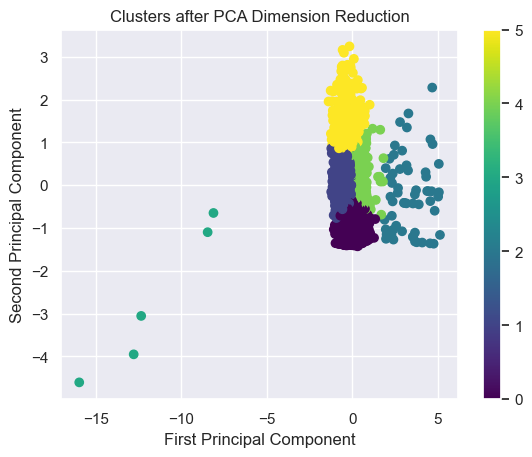

In [32]:
plt.figure()
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clusters after PCA Dimension Reduction')
plt.colorbar(scatter)
plt.show()

In [33]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance ratio:", sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.34792448 0.3105474 ]
Total explained variance ratio: 0.6584718751730543


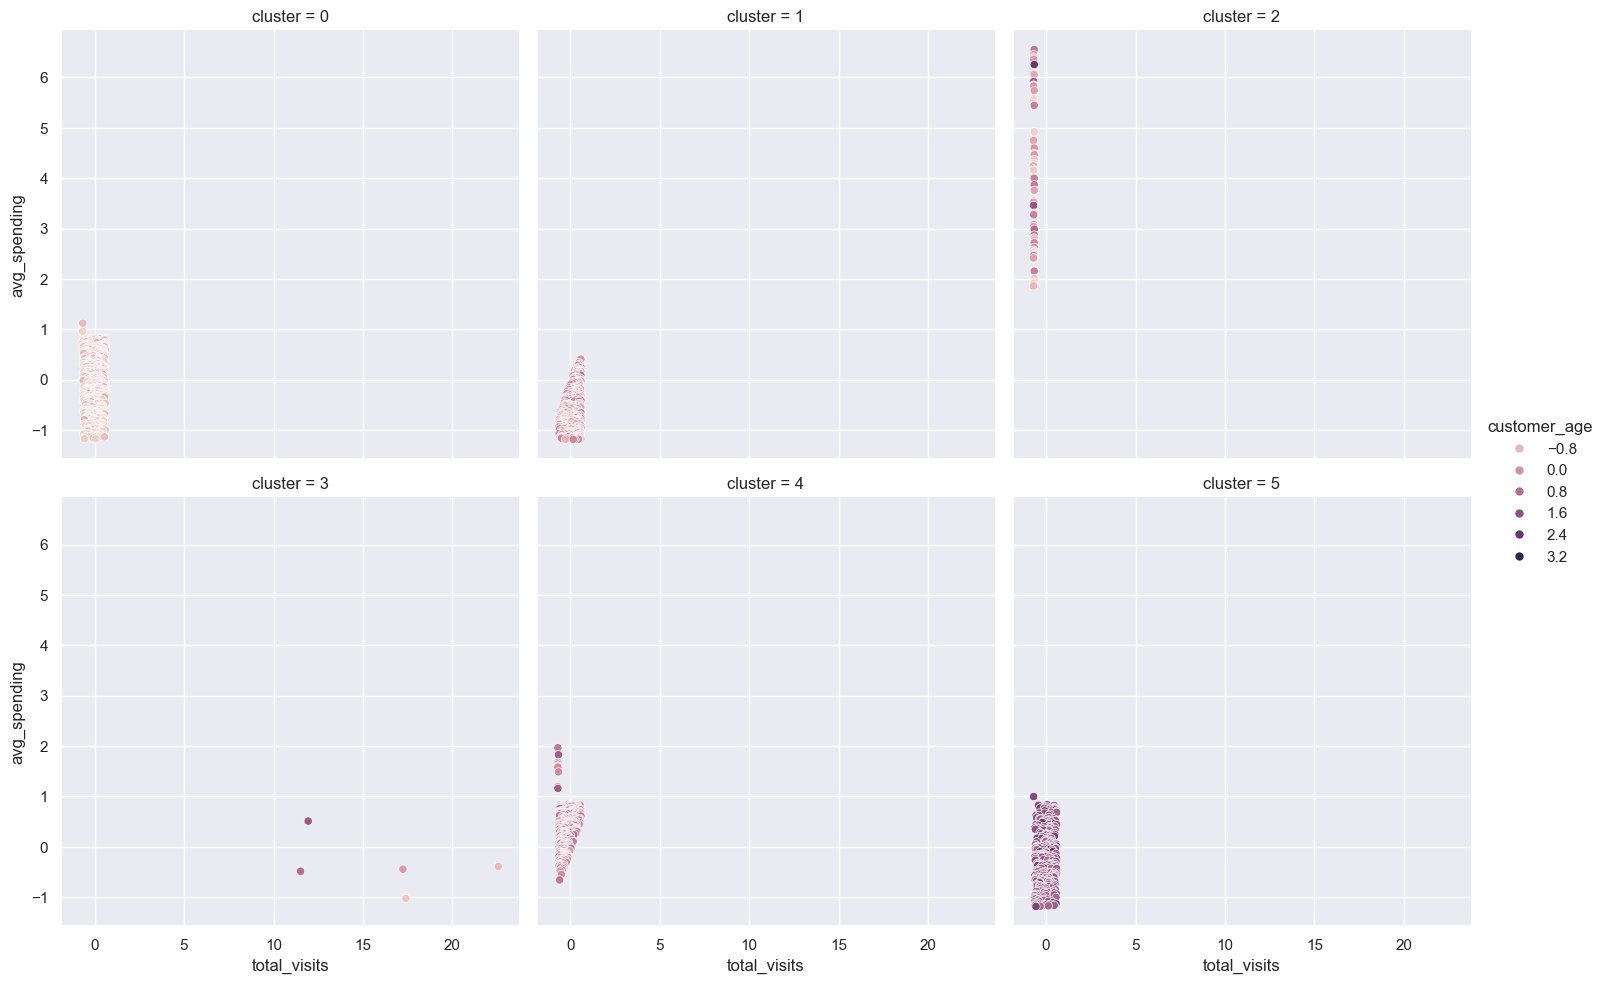

In [34]:
sns.relplot(data=cluster_data, x='total_visits', y='avg_spending', hue='customer_age', col='cluster', col_wrap=3)